<a href="https://colab.research.google.com/github/FabianCufino/PythoninSASViya/blob/master/Codigo_Pickle_HMEQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sklearn2pmml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.0 MB/s 
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.87.0-py3-none-any.whl size=6355215 sha256=b5c24b1afafa755530a9b5cf4f872f58446bf5b6a7dd1cb5c57e74aa2a27d8de
  Stored in directory: /root/.cache/pip/wheels/49/0f/03/e2de608774b13f003eb1da651887cc24634b31b62a936f3a36
Successfully built sklearn2pmml


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
from sklearn2pmml.pipeline import PMMLPipeline
import lightgbm as lgb
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('hmeq.csv')


In [4]:
pp = DataFrameMapper(
    [(["MORTDUE","VALUE","YOJ","DEROG","DELINQ","CLAGE","NINQ","CLNO","DEBTINC"], 
      [SimpleImputer(missing_values=np.nan, strategy='median')])])

In [5]:
missing_col = ['MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()
df.head(10)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,NaN,NaN,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
5,1,1700,30548.0000,40320.000000,HomeImp,Other,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614
6,1,1800,48649.0000,57037.000000,HomeImp,Other,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915
7,1,1800,28502.0000,43034.000000,HomeImp,Other,11.000000,0.00000,0.000000,88.766030,0.000000,8.000000,36.884894
8,1,2000,32700.0000,46740.000000,HomeImp,Other,3.000000,0.00000,2.000000,216.933333,1.000000,12.000000,33.779915
9,1,2000,73760.8172,62250.000000,HomeImp,Sales,16.000000,0.00000,0.000000,115.800000,0.000000,13.000000,33.779915


Imputacion Categoricas

In [7]:
df2 = df.fillna(df.mode().iloc[0])
df2.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
5,1,1700,30548.0000,40320.000000,HomeImp,Other,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614
6,1,1800,48649.0000,57037.000000,HomeImp,Other,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915
7,1,1800,28502.0000,43034.000000,HomeImp,Other,11.000000,0.00000,0.000000,88.766030,0.000000,8.000000,36.884894
8,1,2000,32700.0000,46740.000000,HomeImp,Other,3.000000,0.00000,2.000000,216.933333,1.000000,12.000000,33.779915
9,1,2000,73760.8172,62250.000000,HomeImp,Sales,16.000000,0.00000,0.000000,115.800000,0.000000,13.000000,33.779915


In [8]:
input = df.drop(['LOAN','BAD','REASON','JOB','YOJ','DEROG','CLAGE','NINQ','CLNO'],axis=1)
bad_target = df.BAD
#divir en train y test
x_train, x_test, y_train, y_test = train_test_split(input,bad_target,test_size=0.33,random_state=42)

LIGHTGBM MODEL

In [9]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.277791	training's binary_logloss: 0.277791	valid_0's binary_logloss: 0.310582	valid_0's binary_logloss: 0.310582
[40]	training's binary_logloss: 0.234393	training's binary_logloss: 0.234393	valid_0's binary_logloss: 0.291929	valid_0's binary_logloss: 0.291929
[60]	training's binary_logloss: 0.206315	training's binary_logloss: 0.206315	valid_0's binary_logloss: 0.288373	valid_0's binary_logloss: 0.288373
[80]	training's binary_logloss: 0.18629	training's binary_logloss: 0.18629	valid_0's binary_logloss: 0.289521	valid_0's binary_logloss: 0.289521
[100]	training's binary_logloss: 0.169692	training's binary_logloss: 0.169692	valid_0's binary_logloss: 0.289875	valid_0's binary_logloss: 0.289875


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [10]:
#Imprimimos el Accuracy en training y test
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9306
Testing accuracy 0.8826


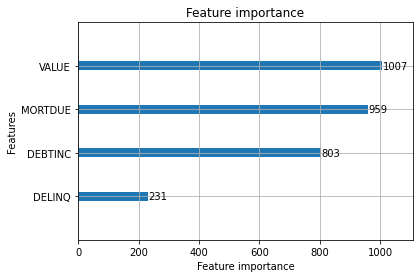

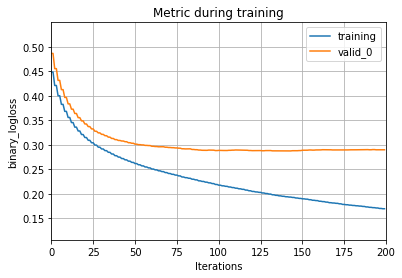

In [11]:
lgb.plot_importance(model)
lgb.plot_metric(model)

##Guarda Modelo a Pickle

In [13]:
import pickle

In [14]:
filename = 'ligthgbm4.pickle'
pickle.dump(model, open(filename, 'wb'))